## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [117]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [127]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [56]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [57]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [58]:
init_printing ()


In [59]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [60]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [61]:
def K(_gamma):
    return H - I*D(_gamma)

In [62]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [63]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [64]:
def U():
    return lambda t: exp(-I*H*t)

In [65]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [66]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [67]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

In [68]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

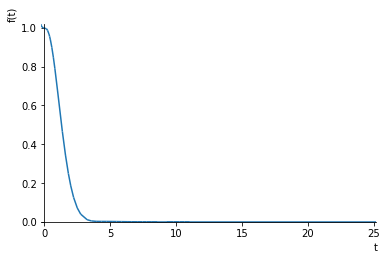

In [69]:
plot(lossy_norm(t),(t, -0.25, 8*pi))

In [70]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [71]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

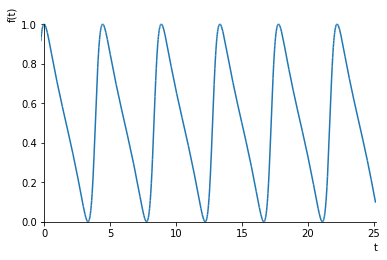

In [72]:
plot(prob_0_detect(t),(t, -0.25, 8*pi))

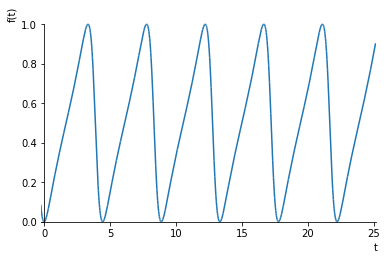

In [73]:
plot(prob_1_detect(t),(t, -0.25, 8*pi))

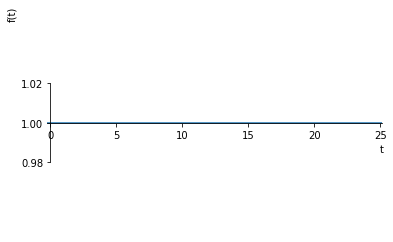

In [74]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

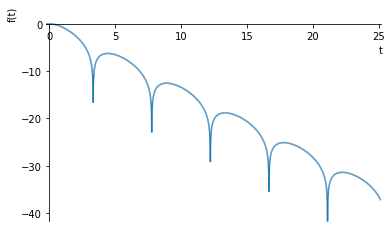

In [75]:
plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

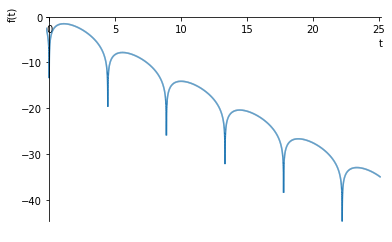

In [76]:
plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [77]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [78]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

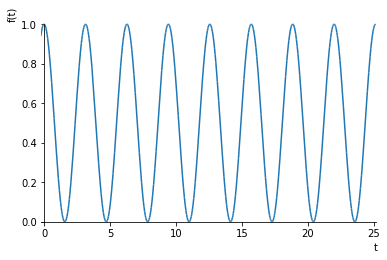

In [79]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi))

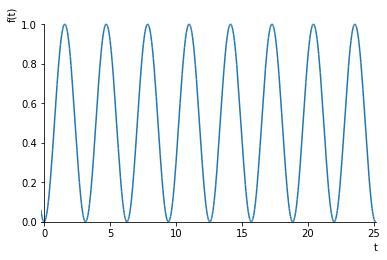

In [80]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi))

In [81]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [82]:
lossy_norm_n(2)

In [83]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [84]:
Y = lossy_norm_n(X)

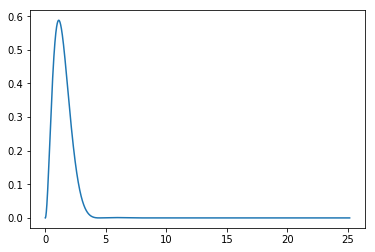

In [85]:
plt.plot(X, -np.gradient(Y, X))

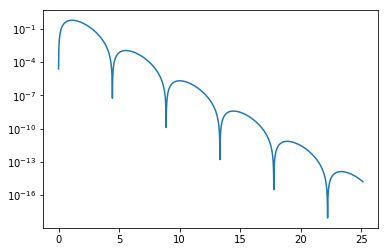

In [86]:
plt.semilogy(X, -np.gradient(Y, X))

In [119]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(5/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [120]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [121]:
hatpsisquarednorm(-1)

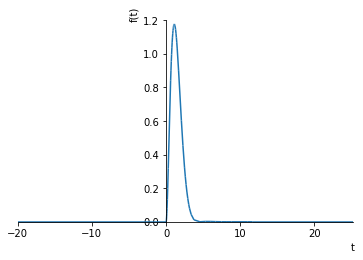

In [124]:
plot(hatpsisquarednorm(t), (t, -20, 8*pi))

In [ ]:
plot(prob_1_unitary(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [ ]:
plot(hatpsisquarednorm(t), (t, 0, 8*pi), yscale='log', ylim=(1e-18, 1e1), adaptive=False, nb_of_points=5000)

In [ ]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [ ]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

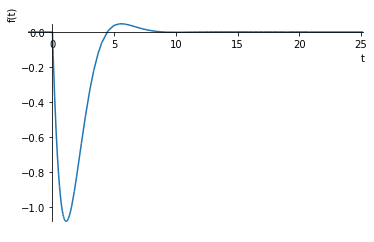

In [125]:
plot(im(hatpsi(t)[1]), (t, -2, 8*pi))

In [ ]:
im(hatpsi(t)[1])

In [132]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

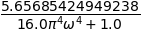

In [143]:
abs(fhatpsi1(omega))**2

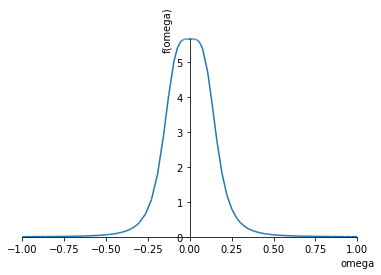

In [144]:
plot(abs(fhatpsi1(omega))**2, (omega, -1, 1))